In [82]:
# import necessary libraries 

import pandas as pd 
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [39]:
movies=pd.read_csv("movies.csv")

In [40]:
print(movies.shape)

(27278, 3)


In [41]:
def explode_list(df, col):
    s = df[col]
    i = np.arange(len(s)).repeat(s.str.len())
    return df.iloc[i].assign(**{col: np.concatenate(s)})

In [42]:
d = movies.assign(genres=lambda d: d.genres.str.split('|'))

movies = explode_list(d, 'genres')

movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy


In [26]:
ratings=pd.read_csv("ratings.csv", nrows=100)


In [27]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [28]:
ratings.to_csv('ratings1.csv')

In [30]:
ratings1=pd.read_csv("ratings1.csv")

In [31]:
ratings1.head()

,Unnamed: 0,userId,movieId,rating,timestamp
0,0,1,2,3.5,1112486027
1,1,1,29,3.5,1112484676
2,2,1,32,3.5,1112484819
3,3,1,47,3.5,1112484727
4,4,1,50,3.5,1112484580


In [32]:
import datetime

def convert_time(timestamp):
    date=datetime.datetime.fromtimestamp(int(timestamp)).strftime('%Y-%m-%d %H:%M:%S')
    return int(date[0:4])


In [33]:
ratings1['year']=ratings1['timestamp'].apply(convert_time)

In [35]:
ratings1.head()

,Unnamed: 0,userId,movieId,rating,timestamp,year
0,0,1,2,3.5,1112486027,2005
1,1,1,29,3.5,1112484676,2005
2,2,1,32,3.5,1112484819,2005
3,3,1,47,3.5,1112484727,2005
4,4,1,50,3.5,1112484580,2005


In [37]:
avg_rates_year=ratings1[['year','rating']].groupby('year').mean()
avg_rates_year

,rating
year,
2004,3.661290
2005,3.731884


In [43]:
movies = movies.drop('title', axis=1)
movies.head()

,movieId,genres
0,1,Adventure
0,1,Animation
0,1,Children
0,1,Comedy
0,1,Fantasy


In [63]:
ratings1 = ratings1.merge(movies, left_on='movieId', right_on='movieId', how='inner')
ratings1.head()

,Unnamed: 0,userId,movieId,rating,timestamp,year,genres
0,0,1,2,3.5,1112486027,2005,Adventure
1,0,1,2,3.5,1112486027,2005,Children
2,0,1,2,3.5,1112486027,2005,Fantasy
3,1,1,29,3.5,1112484676,2005,Adventure
4,1,1,29,3.5,1112484676,2005,Drama


In [72]:
ratings1.shape

(99, 7)

In [67]:
ratings1 = ratings1.loc[ratings1['genres'].isin(['Sci-Fi', 'Animation', 'Comedy', 'Romance', 'Thriller', 'Horror', 'Musical'])]
mean_ratings = ratings1.groupby(['year', 'genres'], as_index=False)['rating'].aggregate(np.mean)
sd_ratings = ratings1.groupby(['year', 'genres'], as_index=False)['rating'].agg(lambda x: np.std(x)) 
sd_ratings.head()

,year,genres,rating
0,2004,Comedy,0.250000
1,2004,Horror,0.249259
2,2004,Musical,0.000000
3,2004,Romance,0.000000
4,2004,Sci-Fi,0.242061


In [68]:
ratings2 = ratings1.groupby(['movieId', 'timestamp', 'genres'], as_index=False)['rating'].aggregate(np.mean)
ratings2.head()

,movieId,timestamp,genres,rating
0,29,1112484676,Sci-Fi,3.5
1,32,1112484819,Sci-Fi,3.5
2,32,1112484819,Thriller,3.5
3,47,1112484727,Thriller,3.5
4,50,1112484580,Thriller,3.5


In [75]:
ratings3 = ratings1.groupby(['userId', 'genres'], as_index=False)['rating'].aggregate(np.mean)
ratings3.head()

,userId,genres,rating
0,1,Animation,3.500000
1,1,Comedy,3.704545
2,1,Horror,3.775000
3,1,Musical,3.750000
4,1,Romance,4.000000


In [76]:
pivot = ratings3.pivot(index='userId', columns='genres', values='rating')
pivot.head()

genres,Animation,Comedy,Horror,Musical,Romance,Sci-Fi,Thriller
userId,,,,,,,
1,3.5,3.704545,3.775,3.75,4.0,3.782609,3.76087


In [77]:
ratings1.corr()

,Unnamed: 0,userId,movieId,rating,timestamp,year
Unnamed: 0,1.000000,NaN,0.981280,-0.099615,-0.171584,-0.171606
userId,NaN,NaN,NaN,NaN,NaN,NaN
movieId,0.981280,NaN,1.000000,-0.102722,-0.130785,-0.130805
rating,-0.099615,NaN,-0.102722,1.000000,0.073449,0.073445
timestamp,-0.171584,NaN,-0.130785,0.073449,1.000000,1.000000
year,-0.171606,NaN,-0.130805,0.073445,1.000000,1.000000


In [78]:
ratings1.fillna(value=0,axis=1,inplace=True)


In [79]:
ratings1.describe()

,Unnamed: 0,userId,movieId,rating,timestamp,year
count,99.000000,99.0,99.000000,99.000000,9.900000e+01,99.000000
mean,51.616162,1.0,1563.919192,3.757576,1.105155e+09,2004.585859
std,29.154307,0.0,871.725718,0.297641,8.762575e+06,0.495080
min,1.000000,1.0,29.000000,3.000000,1.094786e+09,2004.000000
25%,26.000000,1.0,1093.000000,3.500000,1.094786e+09,2004.000000
50%,54.000000,1.0,1348.000000,4.000000,1.112485e+09,2005.000000
75%,79.000000,1.0,2288.000000,4.000000,1.112485e+09,2005.000000
max,98.000000,1.0,3000.000000,4.500000,1.112486e+09,2005.000000


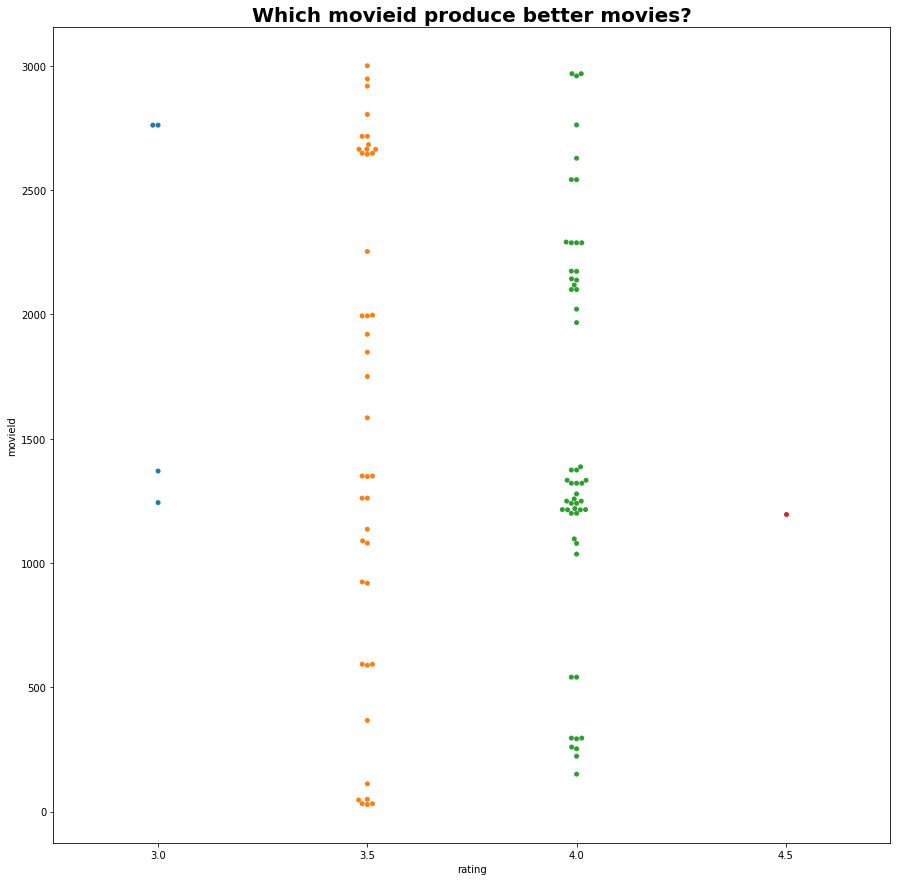

In [84]:
#Slicing the data in half for a clearer visualization
movie_sliced = ratings1[0:2501]

#Building the plot
plt.figure(figsize=(15,15))
sn.swarmplot(x='rating', y='movieId', data = movie_sliced)
plt.title ('Which movieid produce better movies?', fontsize=20, fontweight='bold')
plt.xlabel('rating')
plt.ylabel('movieId')
plt.show()